In [1]:
from qiskit import *
from qiskit.converters import circuit_to_dag
from qiskit.quantum_info import Operator
from qiskit.circuit.library.standard_gates import CPhaseGate, PhaseGate
from qiskit.circuit.library import QFT
from qiskit.visualization import array_to_latex

import quimb as qu
import quimb.tensor as qtn

import numpy as np

# Full QFT MPO circuit implementation

In [2]:
# Num qubits
N = 4
# 10 qubits and tag the initial wavefunction tensors
circ = qtn.Circuit(N=N)
circ.apply_gate('H', 0, gate_round=0)

# TODO: consider applying first controlled phase gate, and then inidividual phase gates. With the individual phase gates, we can just connect their tensors together
circ.apply_gate_raw(CPhaseGate(np.pi/2).to_matrix(), [0, 1], gate_round=0)
circ.apply_gate_raw(CPhaseGate(np.pi/4).to_matrix(), [0, 2], gate_round=0)
circ.apply_gate_raw(CPhaseGate(np.pi/8).to_matrix(), [0, 3], gate_round=0)

circ.apply_gate('H', 1, gate_round=0)
circ.apply_gate_raw(CPhaseGate(np.pi/2).to_matrix(), [1, 2], gate_round=0)
circ.apply_gate_raw(CPhaseGate(np.pi/4).to_matrix(), [1, 3], gate_round=0)

circ.apply_gate('H', 2, gate_round=0)
circ.apply_gate_raw(CPhaseGate(np.pi/2).to_matrix(), [2, 3], gate_round=0)

circ.apply_gate('H', 3, gate_round=0)

In [5]:
circ.psi.tensors

(Tensor(shape=(2,), inds=('_fe41d3AAAAA',), tags=oset(['I0', 'PSI0'])),
 Tensor(shape=(2,), inds=('_fe41d3AAAAC',), tags=oset(['I1', 'PSI0'])),
 Tensor(shape=(2,), inds=('_fe41d3AAAAE',), tags=oset(['I2', 'PSI0'])),
 Tensor(shape=(2,), inds=('_fe41d3AAAAH',), tags=oset(['I3', 'PSI0'])),
 Tensor(shape=(2, 2), inds=('_fe41d3AAAAB', '_fe41d3AAAAA'), tags=oset(['GATE_0', 'ROUND_0', 'H', 'I0'])),
 Tensor(shape=(2, 2, 2), inds=('_fe41d3AAAAD', '_fe41d3AAAAB', 'b'), tags=oset(['GATE_1', 'ROUND_0', 'I0'])),
 Tensor(shape=(2, 2, 2), inds=('b', '_fe41d3AAAAJ', '_fe41d3AAAAC'), tags=oset(['GATE_1', 'ROUND_0', 'I1'])),
 Tensor(shape=(2, 2, 2), inds=('_fe41d3AAAAG', '_fe41d3AAAAD', '_fe41d3AAAAF'), tags=oset(['GATE_2', 'ROUND_0', 'I0'])),
 Tensor(shape=(2, 2, 2), inds=('_fe41d3AAAAF', '_fe41d3AAAAL', '_fe41d3AAAAE'), tags=oset(['GATE_2', 'ROUND_0', 'I2'])),
 Tensor(shape=(2, 2, 2), inds=('k0', '_fe41d3AAAAG', '_fe41d3AAAAI'), tags=oset(['GATE_3', 'ROUND_0', 'I0'])),
 Tensor(shape=(2, 2, 2), inds=('

In [15]:
sorted_circ_tensors = circ.psi.tensors

for i in range(0, len(sorted_circ_tensors), 1):
    print(f"{i}: {sorted_circ_tensors[i]}")


# Contract phase tensors
contracted_tensor = sorted_circ_tensors[10] @ sorted_circ_tensors[15]

print(contracted_tensor)

# Split the tensor with svd
svd_tn = qtn.tensor_core.tensor_split(contracted_tensor, left_inds='_fe41d3AAAAI')

print(svd_tn)



0: Tensor(shape=(2,), inds=('_fe41d3AAAAA',), tags=oset(['I0', 'PSI0']), backend='numpy', dtype='complex128')
1: Tensor(shape=(2,), inds=('_fe41d3AAAAC',), tags=oset(['I1', 'PSI0']), backend='numpy', dtype='complex128')
2: Tensor(shape=(2,), inds=('_fe41d3AAAAE',), tags=oset(['I2', 'PSI0']), backend='numpy', dtype='complex128')
3: Tensor(shape=(2,), inds=('_fe41d3AAAAH',), tags=oset(['I3', 'PSI0']), backend='numpy', dtype='complex128')
4: Tensor(shape=(2, 2), inds=('_fe41d3AAAAB', '_fe41d3AAAAA'), tags=oset(['GATE_0', 'ROUND_0', 'H', 'I0']), backend='numpy', dtype='complex128')
5: Tensor(shape=(2, 2, 2), inds=('_fe41d3AAAAD', '_fe41d3AAAAB', 'b'), tags=oset(['GATE_1', 'ROUND_0', 'I0']), backend='numpy', dtype='complex128')
6: Tensor(shape=(2, 2, 2), inds=('b', '_fe41d3AAAAJ', '_fe41d3AAAAC'), tags=oset(['GATE_1', 'ROUND_0', 'I1']), backend='numpy', dtype='complex128')
7: Tensor(shape=(2, 2, 2), inds=('_fe41d3AAAAG', '_fe41d3AAAAD', '_fe41d3AAAAF'), tags=oset(['GATE_2', 'ROUND_0', 'I0']

In [28]:
array_to_latex(svd_tn.tensors[0].get_params())

<IPython.core.display.Latex object>

In [30]:
array_to_latex(svd_tn.tensors[1].get_params().reshape(4,4))

<IPython.core.display.Latex object>

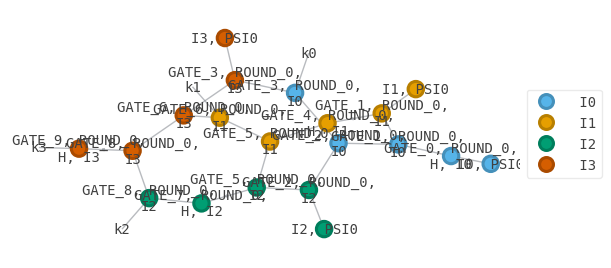

In [4]:
circ.psi.draw(color=[f'I{q}' for q in range(N)])

In [ ]:
circ.schrodinger_contract()